In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Supress warnings

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression,LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

from sklearn import metrics

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

Reading and Understanding data

In [4]:
data = pd.read_csv('test.csv')

In [5]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [6]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [7]:
data.shape

(30000, 171)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,30000.0,84998.500000,8660.398374,69999.000,77498.75000,84998.5000,92498.25000,99998.000
circle_id,30000.0,109.000000,0.000000,109.000,109.00000,109.0000,109.00000,109.000
loc_og_t2o_mou,29684.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
std_og_t2o_mou,29684.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
loc_ic_t2o_mou,29684.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
arpu_6,30000.0,282.644348,314.560212,-185.043,92.90750,198.2275,371.96925,10955.066
arpu_7,30000.0,279.355021,323.205370,-2014.045,87.50475,191.7750,365.25075,13224.119
arpu_8,30000.0,279.845167,326.437029,-146.859,84.18050,191.6905,367.80475,13505.996
onnet_mou_6,28831.0,130.629693,290.677420,0.000,7.28000,34.7600,117.17000,6944.360
onnet_mou_7,28828.0,133.148632,302.921820,0.000,6.66000,32.5500,115.21000,7411.010


percentage of null values in the dataset

In [9]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
arpu_3g_6,22415,0.747167
count_rech_3g_6,22415,0.747167
fb_user_6,22415,0.747167
night_pck_user_6,22415,0.747167
total_rech_data_6,22415,0.747167
max_rech_data_6,22415,0.747167
count_rech_2g_6,22415,0.747167
date_of_last_rech_data_6,22415,0.747167
av_rech_amt_data_6,22415,0.747167
arpu_2g_6,22415,0.747167


In [10]:
missing_data[missing_data>0].shape

(171, 2)

Converting datetime columns to correct format

In [11]:
date_col= data.select_dtypes(include=['object'])

In [12]:
date_col.columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [13]:
for i in date_col.columns:
    data[i] = pd.to_datetime(data[i])

In [14]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    id                        int64         
 1    circle_id                 int64         
 2    loc_og_t2o_mou            float64       
 3    std_og_t2o_mou            float64       
 4    loc_ic_t2o_mou            float64       
 5    last_date_of_month_6      datetime64[ns]
 6    last_date_of_month_7      datetime64[ns]
 7    last_date_of_month_8      datetime64[ns]
 8    arpu_6                    float64       
 9    arpu_7                    float64       
 10   arpu_8                    float64       
 11   onnet_mou_6               float64       
 12   onnet_mou_7               float64       
 13   onnet_mou_8               float64       
 14   offnet_mou_6              float64       
 15   offnet_mou_7              float64       
 16   offnet_mou_8              float64     

Checking all columns which have no variance and only one unique value


In [15]:
tempcols = []
for i in data.columns:
    if data[i].nunique() == 1:
        tempcols.append(i)
print(tempcols)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


Dropping these columns as they have no variance

In [16]:
data.drop(labels=tempcols,axis=1,inplace=True)

In [18]:
data.shape

(30000, 158)

Imputing Mobile Internet Recharge columns

In [19]:
data[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(5)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,NaT,NaN,NaN
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,NaT,NaN,NaN


if date_of_last_rech_data_6 is null and max_rech_data_6 is null and impute total_rech_data_6 is null we can impute max_rech_data_6 as 0 and total_rech_data_6 as 0.

Imputing based on these for all months

In [20]:
for i in range(len(data)):
    if pd.isnull(data['date_of_last_rech_data_6'][i]):
        if pd.isnull(data['max_rech_data_6'][i]):
            if pd.isnull(data['total_rech_data_6'][i]):
                data['max_rech_data_6'][i]=0
                data['total_rech_data_6'][i]=0
    
    if pd.isnull(data['date_of_last_rech_data_7'][i]):
        if pd.isnull(data['max_rech_data_7'][i]):
            if pd.isnull(data['total_rech_data_7'][i]):
                data['max_rech_data_7'][i]=0
                data['total_rech_data_7'][i]=0
                
    if pd.isnull(data['date_of_last_rech_data_8'][i]):
        if pd.isnull(data['max_rech_data_8'][i]):
            if pd.isnull(data['total_rech_data_8'][i]):
                data['max_rech_data_8'][i]=0
                data['total_rech_data_8'][i]=0
                


Dropping columns date_of_last_rech_data

In [21]:
cols = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
data.drop(labels=cols,axis=1,inplace=True)

Imputing avg_rech_amt_data
if total recharge data for a month is 0 we can impute avg rech amount for the month also as 0

In [22]:
for i in range(len(data)):
    if (data['total_rech_data_6'][i]==0):
        if pd.isnull(data['av_rech_amt_data_6'][i]):
                data['av_rech_amt_data_6'][i]=0
                
    if (data['total_rech_data_7'][i] == 0):
         if pd.isnull(data['av_rech_amt_data_7'][i]):
                data['av_rech_amt_data_7'][i]=0
                
    if (data['total_rech_data_8'][i]==0):
         if pd.isnull(data['av_rech_amt_data_8'][i]):
                data['av_rech_amt_data_8'][i]=0


Imputing og_mou columns

In [23]:
data[['std_og_mou_6','isd_og_mou_6','spl_og_mou_6','loc_og_mou_6','total_og_mou_6']].head(10)

,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,loc_og_mou_6,total_og_mou_6
0,48.93,0.0,0.00,43.01,91.94
1,0.00,0.0,0.00,549.86,549.86
2,0.00,0.0,0.00,0.00,0.00
3,37.09,0.0,0.00,8.26,45.36
4,509.03,0.0,0.71,2.84,514.79
5,0.00,0.0,0.00,0.00,0.00
6,0.00,0.0,0.00,35.68,35.68
7,13.71,0.0,2.33,36.08,52.13
8,350.48,0.0,59.98,38.59,450.06
9,NaN,NaN,NaN,NaN,0.00


In [24]:
data['total_og_mou_6'].isnull().sum()

0

There are no null values in total_og_mou_6. We can observe that total_og_mou_6 = std_og_mou_6+isd_og_mou_6+spl_og_mou_6+spl_og_mou_6

if total_og_mou_6 is zero, other values can be imputed as 0

Imputing based on this for all months

In [25]:
for i in range(len(data)):
    if (data['total_og_mou_6'][i] == 0):
        if pd.isnull(data['std_og_mou_6'][i]):
                data['std_og_mou_6'][i]=0
        if pd.isnull(data['isd_og_mou_6'][i]):
                data['isd_og_mou_6'][i]=0
        if pd.isnull(data['spl_og_mou_6'][i]):
                data['spl_og_mou_6'][i]=0
        if pd.isnull(data['loc_og_mou_6'][i]):
                data['loc_og_mou_6'][i]=0
                
    if (data['total_og_mou_7'][i] == 0):
        if pd.isnull(data['std_og_mou_7'][i]):
                data['std_og_mou_7'][i]=0
        if pd.isnull(data['isd_og_mou_7'][i]):
                data['isd_og_mou_7'][i]=0
        if pd.isnull(data['spl_og_mou_7'][i]):
                data['spl_og_mou_7'][i]=0
        if pd.isnull(data['loc_og_mou_7'][i]):
                data['loc_og_mou_7'][i]=0
    
    if (data['total_og_mou_8'][i] == 0):
        if pd.isnull(data['std_og_mou_8'][i]):
                data['std_og_mou_8'][i]=0
        if pd.isnull(data['isd_og_mou_8'][i]):
                data['isd_og_mou_8'][i]=0
        if pd.isnull(data['spl_og_mou_8'][i]):
                data['spl_og_mou_8'][i]=0
        if pd.isnull(data['loc_og_mou_8'][i]):
                data['loc_og_mou_8'][i]=0 


In [27]:
data[['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_mou_6']].head(10)

,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_mou_6
0,24.88,18.13,0.00,43.01
1,75.51,473.61,0.73,549.86
2,0.00,0.00,0.00,0.00
3,5.31,2.94,0.00,8.26
4,0.45,2.39,0.00,2.84
5,0.00,0.00,0.00,0.00
6,13.13,8.38,14.16,35.68
7,0.21,35.86,0.00,36.08
8,4.01,34.58,0.00,38.59
9,NaN,NaN,NaN,0.00


In [28]:
data[['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_mou_7']].head(10)

,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_mou_7
0,20.23,10.89,13.58,44.71
1,41.21,598.08,0.00,639.29
2,0.00,0.00,0.00,0.00
3,0.00,98.61,0.00,98.61
4,0.78,2.66,0.00,3.44
5,0.00,0.00,0.00,0.00
6,8.01,8.34,0.00,16.36
7,0.00,46.64,0.83,47.48
8,1.43,41.26,0.00,42.69
9,15.31,38.18,1.30,54.79


We can observe that loc_og_mou_6 = loc_og_t2t_mou_6+loc_og_t2m_mou_6+loc_og_t2f_mou_6

if loc_og_mou_6 is zero, other values can be imputed as 0

Imputing based on this for all months

In [29]:
for i in range(len(data)):
    if (data['loc_og_mou_6'][i] == 0):
        if pd.isnull(data['loc_og_t2t_mou_6'][i]):
                data['loc_og_t2t_mou_6'][i]=0
        if pd.isnull(data['loc_og_t2m_mou_6'][i]):
                data['loc_og_t2m_mou_6'][i]=0
        if pd.isnull(data['loc_og_t2f_mou_6'][i]):
                data['loc_og_t2f_mou_6'][i]=0
        
                
    if (data['loc_og_mou_7'][i] == 0):
        if pd.isnull(data['loc_og_t2t_mou_7'][i]):
                data['loc_og_t2t_mou_7'][i]=0
        if pd.isnull(data['loc_og_t2m_mou_7'][i]):
                data['loc_og_t2m_mou_7'][i]=0
        if pd.isnull(data['loc_og_t2f_mou_7'][i]):
                data['loc_og_t2f_mou_7'][i]=0
        
                
    if (data['loc_og_mou_8'][i] == 0):
        if pd.isnull(data['loc_og_t2t_mou_8'][i]):
                data['loc_og_t2t_mou_8'][i]=0
        if pd.isnull(data['loc_og_t2m_mou_8'][i]):
                data['loc_og_t2m_mou_8'][i]=0
        if pd.isnull(data['loc_og_t2f_mou_8'][i]):
                data['loc_og_t2f_mou_8'][i]=0
       

In [30]:
data[['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6']].head(10)

,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6
0,6.90,42.03,0.0,48.93
1,0.00,0.00,0.0,0.00
2,0.00,0.00,0.0,0.00
3,0.00,37.09,0.0,37.09
4,450.48,58.54,0.0,509.03
5,0.00,0.00,0.0,0.00
6,0.00,0.00,0.0,0.00
7,0.00,13.71,0.0,13.71
8,286.06,64.41,0.0,350.48
9,NaN,NaN,NaN,0.00


We can observe that std_og_mou_6 = std_og_t2t_mou_6+std_og_t2m_mou_6+std_og_t2f_mou_6+std_og_t2c_mou_6

if std_og_mou_6 is zero, other values can be imputed as 0

Imputing based on this for all months

In [31]:
for i in range(len(data)):
    if (data['std_og_mou_6'][i] == 0):
        if pd.isnull(data['std_og_t2t_mou_6'][i]):
                data['std_og_t2t_mou_6'][i]=0
        if pd.isnull(data['std_og_t2m_mou_6'][i]):
                data['std_og_t2m_mou_6'][i]=0
        if pd.isnull(data['std_og_t2f_mou_6'][i]):
                data['std_og_t2f_mou_6'][i]=0
    if (data['std_og_mou_7'][i] == 0):
        if pd.isnull(data['std_og_t2t_mou_7'][i]):
                data['std_og_t2t_mou_7'][i]=0
        if pd.isnull(data['std_og_t2m_mou_7'][i]):
                data['std_og_t2m_mou_7'][i]=0
        if pd.isnull(data['std_og_t2f_mou_7'][i]):
                data['std_og_t2f_mou_7'][i]=0
    if (data['std_og_mou_8'][i] == 0):
        if pd.isnull(data['std_og_t2t_mou_8'][i]):
                data['std_og_t2t_mou_8'][i]=0
        if pd.isnull(data['std_og_t2m_mou_8'][i]):
                data['std_og_t2m_mou_8'][i]=0
        if pd.isnull(data['std_og_t2f_mou_8'][i]):
                data['std_og_t2f_mou_8'][i]=0


In [32]:
data[['std_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','loc_ic_mou_6','total_ic_mou_6']].head(10)

,std_ic_mou_6,isd_ic_mou_6,spl_ic_mou_6,loc_ic_mou_6,total_ic_mou_6
0,0.36,0.00,0.54,40.81,41.73
1,0.00,114.63,0.00,181.69,296.33
2,0.00,0.00,0.00,0.00,0.00
3,9.63,0.00,0.00,546.06,555.69
4,43.59,0.00,0.00,10.13,53.73
5,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,11.73,11.73
7,10.34,0.00,0.36,59.23,70.26
8,6.36,0.00,0.00,69.44,75.81
9,NaN,NaN,NaN,NaN,0.00


In [33]:
for i in range(len(data)):
    if (data['total_ic_mou_6'][i] == 0):
        if pd.isnull(data['std_ic_mou_6'][i]):
                data['std_ic_mou_6'][i]=0
        if pd.isnull(data['isd_ic_mou_6'][i]):
                data['isd_ic_mou_6'][i]=0
        if pd.isnull(data['spl_ic_mou_6'][i]):
                data['spl_ic_mou_6'][i]=0
        if pd.isnull(data['loc_ic_mou_6'][i]):
                data['loc_ic_mou_6'][i]=0
                
    if (data['total_ic_mou_7'][i] == 0):
        if pd.isnull(data['std_ic_mou_7'][i]):
                data['std_ic_mou_7'][i]=0
        if pd.isnull(data['isd_ic_mou_7'][i]):
                data['isd_ic_mou_7'][i]=0
        if pd.isnull(data['spl_ic_mou_7'][i]):
                data['spl_ic_mou_7'][i]=0
        if pd.isnull(data['loc_ic_mou_7'][i]):
                data['loc_ic_mou_7'][i]=0
    
    if (data['total_ic_mou_8'][i] == 0):
        if pd.isnull(data['std_ic_mou_8'][i]):
                data['std_ic_mou_8'][i]=0
        if pd.isnull(data['isd_ic_mou_8'][i]):
                data['isd_ic_mou_8'][i]=0
        if pd.isnull(data['spl_ic_mou_8'][i]):
                data['spl_ic_mou_8'][i]=0
        if pd.isnull(data['loc_ic_mou_8'][i]):
                data['loc_ic_mou_8'][i]=0 

In [34]:
data[['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6']].head(10)

,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6
0,30.33,10.21,0.26,40.81
1,19.99,160.19,1.49,181.69
2,0.00,0.00,0.00,0.00
3,58.11,487.94,0.00,546.06
4,0.00,10.13,0.00,10.13
5,0.00,0.00,0.00,0.00
6,6.26,5.33,0.13,11.73
7,30.40,28.83,0.00,59.23
8,2.78,65.26,1.39,69.44
9,NaN,NaN,NaN,0.00


We can observe that loc_ic_mou_6 = loc_ic_t2t_mou_6+loc_ic_t2m_mou_6+loc_ic_t2f_mou_6+loc_ic_t2c_mou_6

if loc_ic_mou_6 is zero, other values can be imputed as 0

Imputing based on this for all months

In [35]:
for i in range(len(data)):
    if (data['loc_ic_mou_6'][i] == 0):
        if pd.isnull(data['loc_ic_t2t_mou_6'][i]):
                data['loc_ic_t2t_mou_6'][i]=0
        if pd.isnull(data['loc_ic_t2m_mou_6'][i]):
                data['loc_ic_t2m_mou_6'][i]=0
        if pd.isnull(data['loc_ic_t2f_mou_6'][i]):
                data['loc_ic_t2f_mou_6'][i]=0
        
                
    if (data['loc_ic_mou_7'][i] == 0):
        if pd.isnull(data['loc_ic_t2t_mou_7'][i]):
                data['loc_ic_t2t_mou_7'][i]=0
        if pd.isnull(data['loc_ic_t2m_mou_7'][i]):
                data['loc_ic_t2m_mou_7'][i]=0
        if pd.isnull(data['loc_ic_t2f_mou_7'][i]):
                data['loc_ic_t2f_mou_7'][i]=0
         
                
    if (data['loc_ic_mou_8'][i] == 0):
        if pd.isnull(data['loc_ic_t2t_mou_8'][i]):
                data['loc_ic_t2t_mou_8'][i]=0
        if pd.isnull(data['loc_ic_t2m_mou_8'][i]):
                data['loc_ic_t2m_mou_8'][i]=0
        if pd.isnull(data['loc_ic_t2f_mou_8'][i]):
                data['loc_ic_t2f_mou_8'][i]=0

In [36]:
data[['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_mou_6']].head(10)

,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6
0,0.00,0.36,0.00,0.36
1,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00
3,0.00,9.63,0.00,9.63
4,29.71,13.88,0.00,43.59
5,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00
7,0.00,3.13,7.21,10.34
8,3.94,2.41,0.00,6.36
9,NaN,NaN,NaN,0.00


We can observe that std_ic_mou_6 = std_ic_t2t_mou_6+std_ic_t2m_mou_6+std_ic_t2f_mou_6+std_ic_t2c_mou_6

if std_ic_mou_6 is zero, other values can be imputed as 0

Imputing based on this for all months

In [37]:
for i in range(len(data)):
    if (data['std_ic_mou_6'][i] == 0):
        if pd.isnull(data['std_ic_t2t_mou_6'][i]):
                data['std_ic_t2t_mou_6'][i]=0
        if pd.isnull(data['std_ic_t2m_mou_6'][i]):
                data['std_ic_t2m_mou_6'][i]=0
        if pd.isnull(data['std_ic_t2f_mou_6'][i]):
                data['std_ic_t2f_mou_6'][i]=0
                
    if (data['std_ic_mou_7'][i] == 0):
        if pd.isnull(data['std_ic_t2t_mou_7'][i]):
                data['std_ic_t2t_mou_7'][i]=0
        if pd.isnull(data['std_ic_t2m_mou_7'][i]):
                data['std_ic_t2m_mou_7'][i]=0
        if pd.isnull(data['std_ic_t2f_mou_7'][i]):
                data['std_ic_t2f_mou_7'][i]=0
                
    if (data['std_ic_mou_8'][i] == 0):
        if pd.isnull(data['std_ic_t2t_mou_8'][i]):
                data['std_ic_t2t_mou_8'][i]=0
        if pd.isnull(data['std_ic_t2m_mou_8'][i]):
                data['std_ic_t2m_mou_8'][i]=0
        if pd.isnull(data['std_ic_t2f_mou_8'][i]):
                data['std_ic_t2f_mou_8'][i]=0

Deleting date columns

In [38]:
cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
data.drop(labels=cols,axis=1,inplace=True)

Deleting columns with more than 70% missing

In [39]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
cols = missing_data[missing_data.Percent>0.7].index
data.drop(labels=cols,axis=1,inplace=True)

In [40]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
print(missing_data[missing_data.Percent>0])


                  Total   Percent
roam_og_mou_8      1675  0.055833
roam_ic_mou_8      1675  0.055833
ic_others_8        1675  0.055833
loc_og_t2c_mou_8   1675  0.055833
og_others_8        1675  0.055833
onnet_mou_8        1675  0.055833
offnet_mou_8       1675  0.055833
loc_og_t2c_mou_7   1172  0.039067
og_others_7        1172  0.039067
ic_others_7        1172  0.039067
roam_og_mou_7      1172  0.039067
roam_ic_mou_7      1172  0.039067
offnet_mou_7       1172  0.039067
onnet_mou_7        1172  0.039067
roam_og_mou_6      1169  0.038967
roam_ic_mou_6      1169  0.038967
offnet_mou_6       1169  0.038967
onnet_mou_6        1169  0.038967
og_others_6        1169  0.038967
loc_og_t2c_mou_6   1169  0.038967
ic_others_6        1169  0.038967


KNN Imputation

In [41]:
imputer = KNNImputer()
data[missing_data.index] = imputer.fit_transform(data[missing_data.index])

In [52]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
print(missing_data[missing_data.Percent>0])

Empty DataFrame
Columns: [Total, Percent]
Index: []


Outlier Treatment

<Axes: >

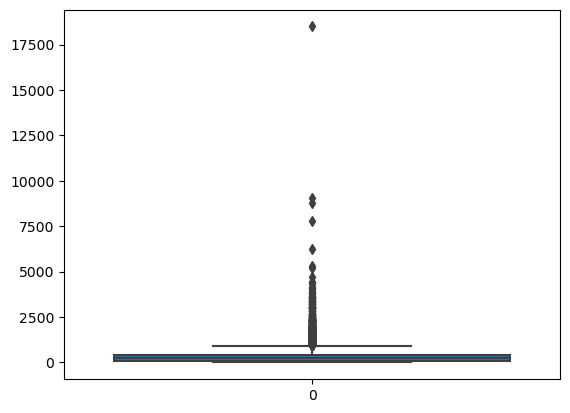

In [42]:
sns.boxplot(data['total_rech_amt_6'])

In [43]:
data['total_rech_amt_6'].describe()

count    30000.000000
mean       326.055900
std        383.187192
min          0.000000
25%        104.000000
50%        230.000000
75%        436.250000
max      18500.000000
Name: total_rech_amt_6, dtype: float64

In [44]:
def drop_outliers(x,col):
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
        return x   

data = drop_outliers(data,'total_rech_amt_6')

<Axes: ylabel='total_rech_amt_7'>

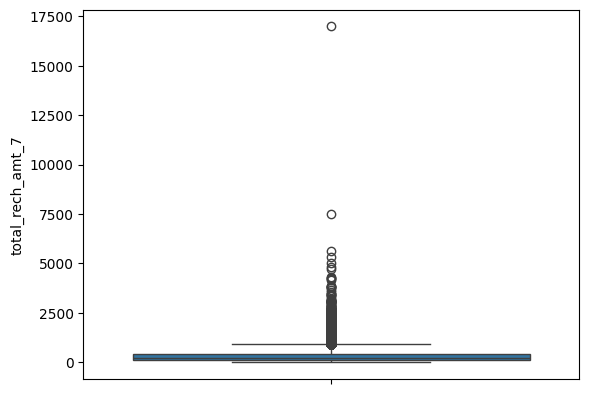

In [57]:
sns.boxplot(data['total_rech_amt_7'])

In [58]:
data['total_rech_amt_7'].describe()

count    29986.000000
mean       322.647269
std        379.846564
min          0.000000
25%        100.000000
50%        220.000000
75%        425.750000
max      16984.000000
Name: total_rech_amt_7, dtype: float64

for total_rech_amt_7 also we can see max value as 16984. Dropping outlier

In [45]:
data = drop_outliers(data,'total_rech_amt_7')

In [46]:
data['total_rech_amt_7'].describe()

count    29976.000000
mean       320.660095
std        357.715994
min          0.000000
25%        100.000000
50%        220.000000
75%        425.000000
max       4216.000000
Name: total_rech_amt_7, dtype: float64

<Axes: >

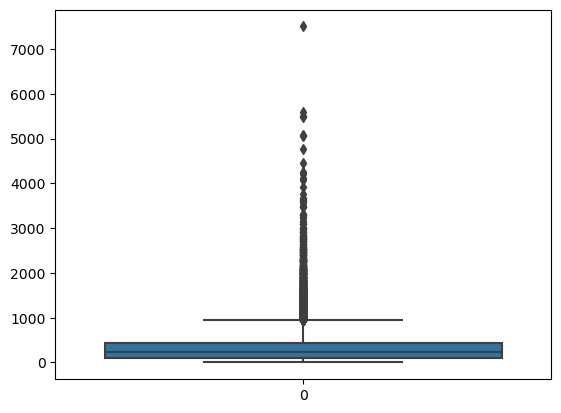

In [47]:
sns.boxplot(data['total_rech_amt_8'])

In [48]:
data = drop_outliers(data,'total_rech_amt_8')

In [49]:
data['total_rech_amt_8'].describe()

count    29966.000000
mean       320.501135
std        356.542855
min          0.000000
25%         90.000000
50%        225.000000
75%        430.000000
max       4114.000000
Name: total_rech_amt_8, dtype: float64

Filtering High valued customers

In [50]:
## We dont have column for data recharge amounts. Hence calculating it by mulitplying recharged data with average recharge amount

data['total_data_rech_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['total_data_rech_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7
data['rech_amt_6'] = data['total_data_rech_7'] + data['total_data_rech_6']
data['rech_amt_7'] = data['total_rech_amt_7'] + data['total_data_rech_7']

In [51]:
data['avg_rech_amt_goodphase'] = (data['rech_amt_6']+data['rech_amt_7'])/2

In [52]:
data.drop(['total_data_rech_6','total_data_rech_7','rech_amt_6','rech_amt_7','total_data_rech_7','total_data_rech_6'],axis=1,inplace=True)

In [53]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
hvc = data.loc[data.avg_rech_amt_goodphase >= data.avg_rech_amt_goodphase.quantile(0.7), :]
hvc = hvc.reset_index(drop=True)
hvc.shape

(8997, 135)

Tag Churn Customers

In [54]:
def Churn(x):
    
    if (x['total_ic_mou_8']== 0) & (x['total_og_mou_8']==0) & (x['vol_2g_mb_8']== 0) & (x['vol_3g_mb_8']==0):
        return 1
    else:
        return 0
   

hvc['churn'] = [Churn(x) for i,x in hvc.iterrows()]

In [55]:
hvc['churn'].value_counts()

churn
0    8640
1     357
Name: count, dtype: int64

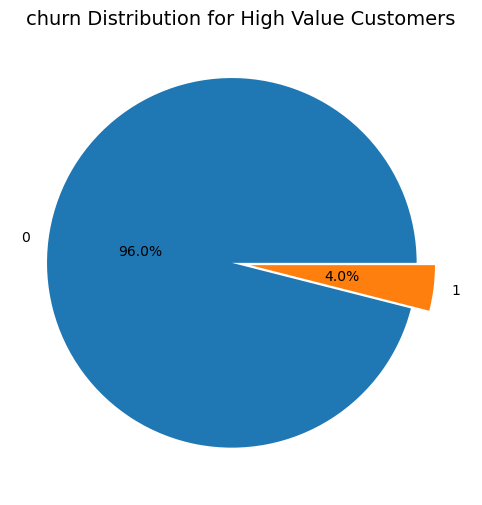

In [56]:
def pie_chart(ds,col):
    column = ds[col].value_counts(normalize=True)
    pie, ax = plt.subplots(figsize=[10,6])
    labels = column.keys()
    plt.pie(x=column, autopct="%.1f%%", labels=labels, pctdistance=0.5,explode=[0.05]*2)
    plt.title(col + " Distribution for High Value Customers", fontsize=14);
    

pie_chart(hvc,'churn')

Calculating Difference between Average revenue per user in Action Phase and Good Phase

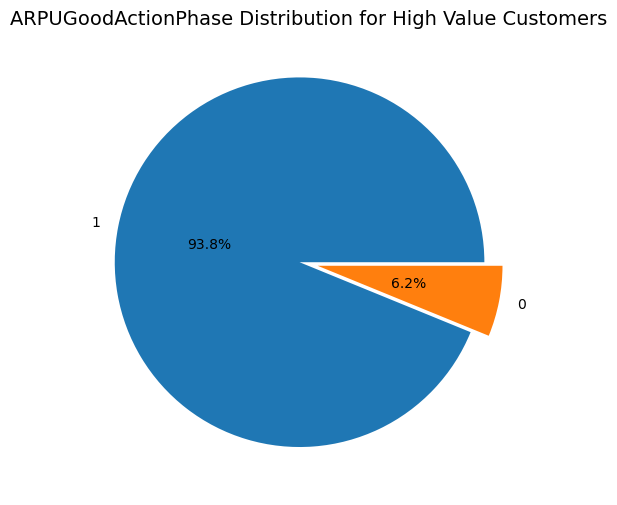

In [57]:
def ChurnPred(x):
    amt = (x['arpu_8']- (x['arpu_7']+x['arpu_6']))
    if(amt <= 0):
        return 1
    else:
        return 0
        
hvc['ARPUGoodActionPhase'] = [ChurnPred(x) for i,x in hvc.iterrows()]

pie_chart(hvc,'ARPUGoodActionPhase')

93.8% customers avergage revenue per user has decreased in action phase compared to good phase.

Deleting columns from Churn Phase¶

In [58]:
cols = [ col for col in hvc.columns if '8' in col ]
cols

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8']

In [59]:
hvc.drop(labels=cols,axis=1,inplace=True)

In [60]:
hvc.shape

(8997, 94)

Checking MultiCollinearity

In [61]:
hvc.corr().loc[:,"churn"].abs().sort_values(ascending=False)

churn                     1.000000
roam_og_mou_7             0.124534
roam_ic_mou_7             0.091478
total_ic_mou_7            0.082509
loc_ic_mou_7              0.082021
aug_vbc_3g                0.080764
roam_og_mou_6             0.079372
loc_ic_t2m_mou_7          0.078049
std_og_mou_6              0.075904
monthly_2g_7              0.075058
loc_og_mou_7              0.072802
aon                       0.071199
loc_og_t2m_mou_7          0.070524
roam_ic_mou_6             0.064907
av_rech_amt_data_7        0.064477
loc_ic_mou_6              0.059924
std_og_t2t_mou_6          0.058071
std_og_t2m_mou_6          0.057784
total_ic_mou_6            0.056392
loc_ic_t2f_mou_7          0.054689
loc_ic_t2m_mou_6          0.054383
max_rech_data_7           0.051283
loc_og_mou_6              0.051159
total_rech_data_7         0.050990
monthly_2g_6              0.049204
ARPUGoodActionPhase       0.047440
loc_og_t2m_mou_6          0.046844
jul_vbc_3g                0.045450
vol_3g_mb_7         

In [62]:
hvc_corr =  hvc.corr(method='pearson')
corr = hvc_corr.where(np.triu(np.ones(hvc_corr.shape), k=1).astype(bool))
corr_df=corr.unstack().reset_index()

corr_df.columns = ['Variable1','Variable2','CORRELATION']
corr_df['CORR_ABS'] = abs(corr_df['CORRELATION'])
corr_df.sort_values('CORR_ABS', ascending=False).head(30)

,Variable1,Variable2,CORRELATION,CORR_ABS
5923,total_rech_amt_6,arpu_6,0.958610,0.958610
6018,total_rech_amt_7,arpu_7,0.946089,0.946089
5025,total_ic_mou_6,loc_ic_mou_6,0.904368,0.904368
7683,sachet_2g_6,total_rech_data_6,0.904115,0.904115
7778,sachet_2g_7,total_rech_data_7,0.896970,0.896970
5120,total_ic_mou_7,loc_ic_mou_7,0.890948,0.890948
2072,std_og_t2t_mou_7,onnet_mou_7,0.862414,0.862414
3609,loc_ic_t2t_mou_7,loc_ic_t2t_mou_6,0.858735,0.858735
4179,loc_ic_mou_7,loc_ic_mou_6,0.854432,0.854432
1977,std_og_t2t_mou_6,onnet_mou_6,0.853737,0.853737


EDA and Deriving new Features
Comparing calls made to customer care in action phase and good phase

In [63]:
t2ccalls = hvc['loc_og_t2c_mou_7'] - (hvc['loc_og_t2c_mou_6']+hvc['loc_og_t2c_mou_6'])

In [64]:
hvc['t2calls'] = t2ccalls.apply(lambda x: 1 if x>=0 else 0)

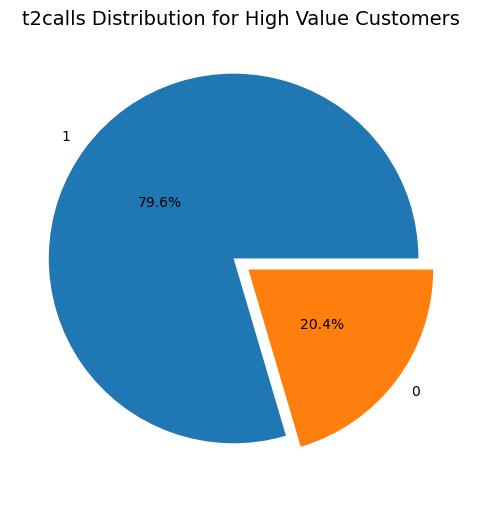

In [65]:
pie_chart(hvc,'t2calls')

Analyzing Age on Network

<Axes: >

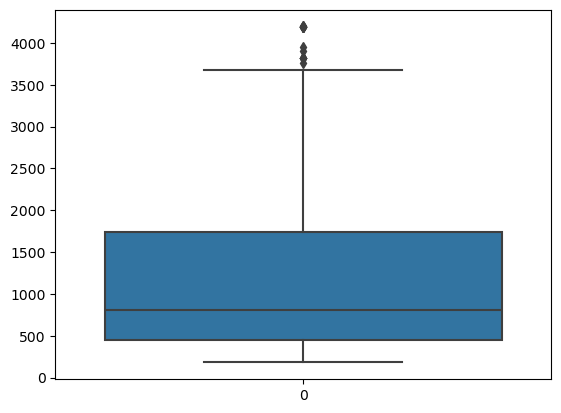

In [66]:
sns.boxplot(hvc['aon'])

Creating a new column to convert age on network from days to months

In [67]:
hvc['tenure_in_months'] = hvc['aon']/30

<Axes: >

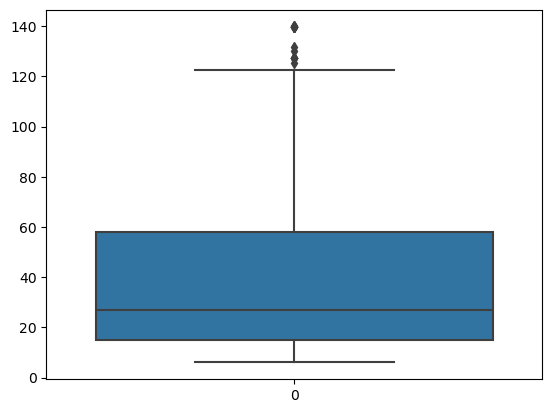

In [68]:
sns.boxplot(hvc['tenure_in_months'])

Binning the tenure

In [69]:
hvc['tenure_in_months_bin'] = pd.cut(hvc['tenure_in_months'], [0, 6, 12, 24, 60, 61], labels=[ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above'])
hvc['tenure_in_months_bin'].value_counts()

tenure_in_months_bin
2-5 Yrs            2715
1-2 Yrs            2455
6-12 Months        1645
5 Yrs and above      40
0-6 Months            7
Name: count, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

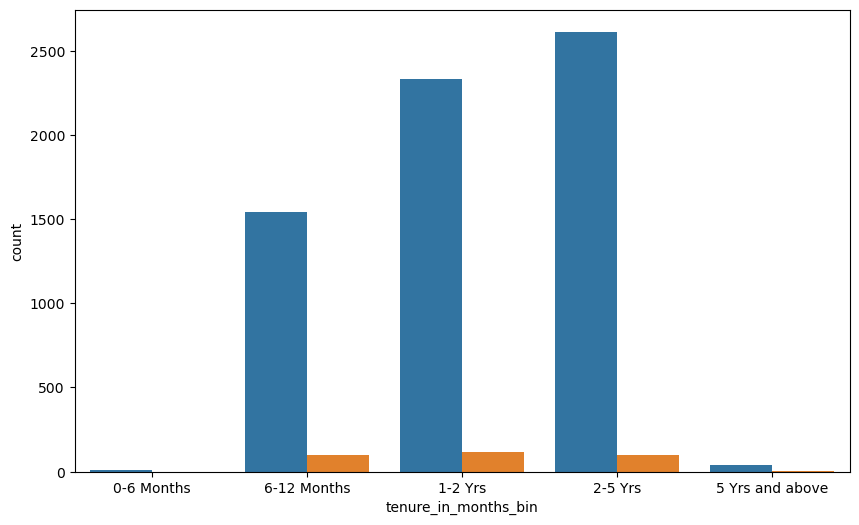

In [70]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.countplot(x='tenure_in_months_bin', hue='churn', data=hvc)
plt.title('Count of Churn by Tenure Bins')
plt.xlabel('Tenure in Months (Binned)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

Customers who have been longer with network churn less

In [71]:
hvc.drop('aon',axis=1, inplace=True)

Calls made to customer care vs churn rate in action phase

<Axes: xlabel='churn', ylabel='loc_og_t2c_mou_7'>

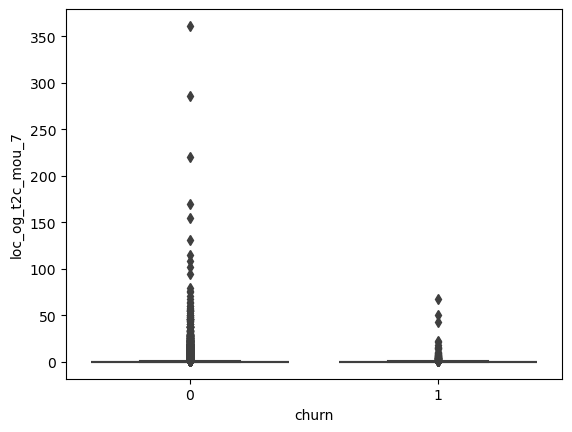

In [72]:
sns.boxplot(y = hvc['loc_og_t2c_mou_7'],x = hvc['churn'])

Total number of recharges in Action Phase vs Churn¶

In [73]:
cols = [ col for col in hvc.columns if 'num' in col ]
cols

['total_rech_num_6', 'total_rech_num_7']

In [74]:
hvc['total_rech_num_7'].value_counts()

total_rech_num_7
6.0      765
5.0      720
4.0      687
8.0      640
7.0      623
9.0      575
3.0      529
10.0     515
11.0     417
12.0     379
13.0     328
2.0      285
14.0     277
15.0     225
16.0     217
17.0     183
18.0     181
19.0     151
20.0     119
21.0     108
24.0      98
22.0      96
23.0      86
1.0       77
25.0      70
26.0      65
28.0      59
27.0      48
30.0      43
29.0      42
31.0      35
32.0      31
33.0      28
34.0      22
39.0      20
35.0      19
36.0      19
40.0      15
38.0      15
42.0      14
43.0      13
0.0       12
45.0      12
46.0      11
41.0      11
37.0      11
48.0       7
44.0       7
51.0       5
52.0       5
58.0       5
60.0       5
53.0       4
59.0       4
57.0       4
47.0       4
65.0       4
56.0       3
54.0       3
55.0       3
81.0       3
66.0       3
61.0       3
62.0       2
80.0       2
110.0      2
49.0       2
70.0       2
67.0       2
68.0       2
86.0       2
93.0       2
50.0       2
76.0       1
71.0       1
107.0   

AttributeError: 'numpy.int64' object has no attribute 'startswith'

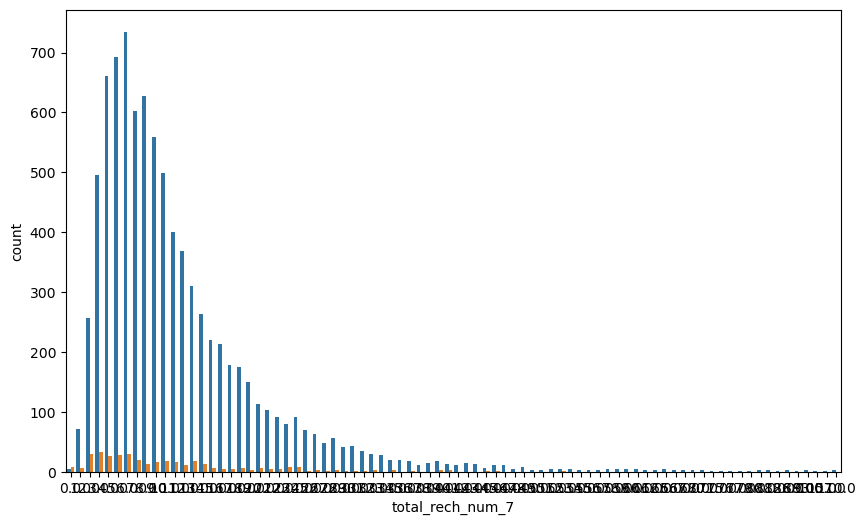

In [75]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.countplot(x='total_rech_num_7', hue='churn', data=hvc)
plt.title('Count of Churn by Total Recharge Number (7 Days)')
plt.xlabel('Total Recharge Number (7 Days)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

In [76]:
hvc['loc_og_t2c_mou_7'].describe()

count    8997.000000
mean        1.966076
std         8.490055
min         0.000000
25%         0.000000
50%         0.000000
75%         0.310000
max       361.340000
Name: loc_og_t2c_mou_7, dtype: float64

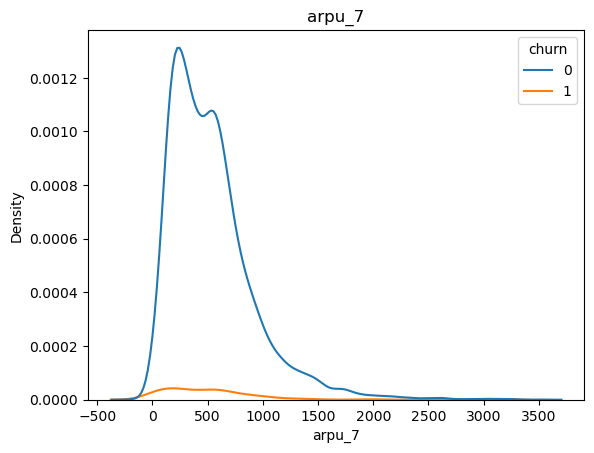

In [77]:
sns.kdeplot(x='arpu_7',data=hvc,hue="churn")
plt.title("arpu_7")
plt.show()

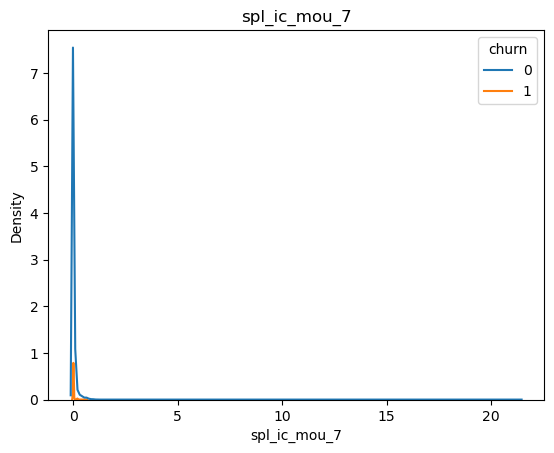

In [78]:
sns.kdeplot(data=hvc, x="spl_ic_mou_7", hue="churn")
plt.title("spl_ic_mou_7")
plt.show()

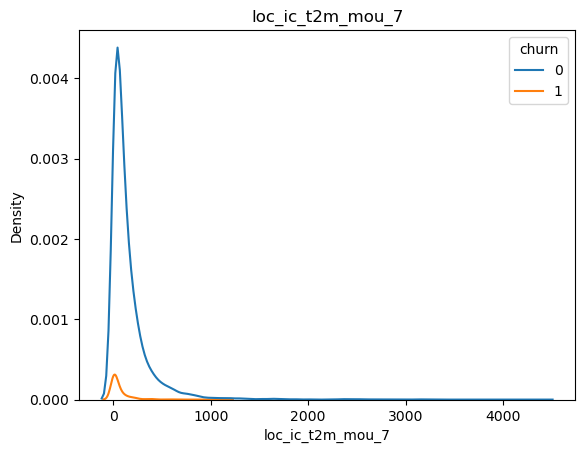

In [79]:
sns.kdeplot(data=hvc, x="loc_ic_t2m_mou_7", hue="churn")
plt.title("loc_ic_t2m_mou_7")
plt.show()

Handling Categorical Variables

In [80]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(hvc[['total_rech_num_7','tenure_in_months_bin']], drop_first=True)
dummy.head()

,total_rech_num_7,tenure_in_months_bin_6-12 Months,tenure_in_months_bin_1-2 Yrs,tenure_in_months_bin_2-5 Yrs,tenure_in_months_bin_5 Yrs and above
0,9.0,True,False,False,False
1,11.0,False,True,False,False
2,17.0,True,False,False,False
3,7.0,False,False,False,False
4,7.0,False,False,True,False


In [81]:
hvc = pd.concat([hvc,dummy],axis=1)

In [82]:
hvc.drop(['total_rech_num_7','tenure_in_months_bin'],axis=1,inplace=True)

In [83]:
hvc.shape

(8997, 98)

Train Test Split

In [84]:
X = hvc.drop(['churn'],axis=1)
y =hvc['churn']

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (6297, 97)
Dimension of X_test: (2700, 97)


Scaling the numerical columns

In [86]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()


scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [87]:
X_train.shape

(6297, 97)

Handling Class Imbalance

In [123]:
pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.3 kB 487.6 kB/s eta 0:00:01
   ------------------------------- -------- 204.8/258.3 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: mermaid 0.3.2 has a non-standard dependency specifier torch>=1.7torchvision. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mermaid or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [89]:
X_train_sm.shape

(12098, 97)

Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initialize logistic regression
logreg = LogisticRegression()

# Set up RFE with keyword argument for number of features
rfe = RFE(estimator=logreg, n_features_to_select=30)

# Fit RFE
rfe.fit(X_train_sm, y_train_sm)

# Get selected features
selected_features = X_train_sm.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['offnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_mou_7',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'spl_og_mou_7', 'total_og_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2m_mou_6',
       'total_ic_mou_7', 'total_rech_amt_7', 'max_rech_amt_6',
       'max_rech_amt_7', 'last_day_rch_amt_7', 'total_rech_data_7',
       'max_rech_data_6', 'av_rech_amt_data_7', 'monthly_2g_6', 'monthly_2g_7',
       'sachet_2g_7', 'aug_vbc_3g', 'ARPUGoodActionPhase'],
      dtype='object')


In [91]:
RFE(estimator=LogisticRegression(), n_features_to_select=30)

RFE(estimator=LogisticRegression(), n_features_to_select=30)

In [92]:
col = X_train_sm.columns[rfe.support_]

In [93]:
col

Index(['offnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_mou_7',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'spl_og_mou_7', 'total_og_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2m_mou_6',
       'total_ic_mou_7', 'total_rech_amt_7', 'max_rech_amt_6',
       'max_rech_amt_7', 'last_day_rch_amt_7', 'total_rech_data_7',
       'max_rech_data_6', 'av_rech_amt_data_7', 'monthly_2g_6', 'monthly_2g_7',
       'sachet_2g_7', 'aug_vbc_3g', 'ARPUGoodActionPhase'],
      dtype='object')

In [94]:
import statsmodels.api as sm 
X_train_model = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train_sm,X_train_model, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                12098
Model:                            GLM   Df Residuals:                    12067
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5399.0
Date:                Wed, 23 Oct 2024   Deviance:                       10798.
Time:                        10:41:16   Pearson chi2:                 8.89e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3897
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.6460      0.376     -7.033      0.000      -3.383      -1.909
offnet_mou_6            7.0463      1.209      5.827      0.000       4.676       9.416
roam_ic_mou_7           7.1562      0.984      7.270      0.000       5.227       9.085
roam_og_mou_7           3.8934      0.852      4.572      0.000       2.224       5.562
loc_og_t2t_mou_6       -6.5516      2.213     -2.961      0.003     -10.889      -2.214
loc_og_t2m_mou_7       -9.4720      1.835     -5.163      0.000     -13.068      -5.876
loc_og_t2f_mou_7      -35.9237      5.643     -6.366      0.000     -46.985     -24.863
loc_og_mou_7           -1.3968      2.657     -0.526      0.599      -6.604       3.811
std_og_t2t_mou_6       11.7918      1.961      6.012      0.000       7.947      15.636
std_og_t2t_mou_7       -4.6917      0.928     -5.057      0.000      -6.510      -2.873
std_og_t2f_mou_6       -4.0134      1.126     -3.564      0.000      -6.221      -1.806
std_og_mou_6           -2.8271      1.753     -1.613      0.107      -6.263       0.609
spl_og_mou_7           -3.1257      0.715     -4.371      0.000      -4.527      -1.724
total_og_mou_7         -2.9337      0.962     -3.049      0.002      -4.819      -1.048
loc_ic_t2m_mou_7      -10.4757      1.770     -5.920      0.000     -13.944      -7.007
loc_ic_t2f_mou_7      -15.1649      2.555     -5.935      0.000     -20.173     -10.157
loc_ic_mou_7           -1.9103      1.843     -1.036      0.300      -5.523       1.703
std_ic_t2m_mou_6       -9.1448      1.605     -5.696      0.000     -12.291      -5.998
total_ic_mou_7         -0.7618      1.254     -0.607      0.544      -3.220       1.697
total_rech_amt_7       -3.1059      0.551     -5.636      0.000      -4.186      -2.026
max_rech_amt_6         -4.0056      0.878     -4.562      0.000      -5.726      -2.285
max_rech_amt_7          5.1760      0.887      5.834      0.000       3.437       6.915
last_day_rch_amt_7     -5.4472      0.633     -8.603      0.000      -6.688      -4.206
total_rech_data_7      -2.6055      1.219     -2.137      0.033      -4.995      -0.216
max_rech_data_6         3.7793      0.675      5.602      0.000       2.457       5.101
av_rech_amt_data_7     -2.8232      1.026     -2.751      0.006      -4.835      -0.812
monthly_2g_6           -1.8165      0.346     -5.252      0.000      -2.494      -1.139
monthly_2g_7           -8.4275      0.494    -17.045      0.000      -9.397      -7.458
sachet_2g_7            -3.0898      0.814     -3.795      0.000      -4.686      -1.494
aug_vbc_3g            -32.6567      1.522    -21.462      0.000     -35.639     -29.675
ARPUGoodActionPhase     4.5738      0.376     12.150      0.000       3.836       5.312
=======================================================================================
"""

In [132]:
vif = pd.DataFrame()
vif['Features'] = X_train_model[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_model[col].values, i) for i in range(X_train_model[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,std_og_mou_6,33.13
6,std_og_t2t_mou_6,18.00
11,total_og_mou_7,15.94
0,offnet_mou_6,13.70
18,total_rech_amt_7,13.46
14,loc_ic_mou_7,12.85
22,total_rech_data_7,11.66
17,total_ic_mou_7,10.70
27,sachet_2g_7,8.60
7,std_og_t2t_mou_7,7.44


In [95]:
X_train_model = sm.add_constant(X_train_model[col])
logm2 = sm.GLM(y_train_sm,X_train_model[col], family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                12098
Model:                            GLM   Df Residuals:                    12068
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5443.0
Date:                Wed, 23 Oct 2024   Deviance:                       10886.
Time:                        10:41:17   Pearson chi2:                 3.09e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3852
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
offnet_mou_6            6.8301      1.205      5.670      0.000       4.469       9.191
roam_ic_mou_7           5.1000      0.972      5.248      0.000       3.195       7.005
roam_og_mou_7           4.5273      0.902      5.017      0.000       2.759       6.296
loc_og_t2t_mou_6       -6.5910      2.210     -2.982      0.003     -10.923      -2.259
loc_og_t2m_mou_7       -9.1872      1.824     -5.038      0.000     -12.761      -5.613
loc_og_t2f_mou_7      -36.4064      5.666     -6.426      0.000     -47.511     -25.302
loc_og_mou_7           -1.2279      2.652     -0.463      0.643      -6.426       3.970
std_og_t2t_mou_6       11.3964      1.954      5.832      0.000       7.566      15.227
std_og_t2t_mou_7       -4.6612      0.928     -5.025      0.000      -6.479      -2.843
std_og_t2f_mou_6       -3.8084      1.110     -3.432      0.001      -5.983      -1.634
std_og_mou_6           -2.3845      1.748     -1.364      0.173      -5.811       1.042
spl_og_mou_7           -3.3613      0.715     -4.702      0.000      -4.762      -1.960
total_og_mou_7         -3.2760      0.964     -3.398      0.001      -5.166      -1.386
loc_ic_t2m_mou_7      -10.8569      1.779     -6.103      0.000     -14.343      -7.370
loc_ic_t2f_mou_7      -15.5983      2.570     -6.069      0.000     -20.636     -10.561
loc_ic_mou_7           -1.8545      1.839     -1.008      0.313      -5.459       1.750
std_ic_t2m_mou_6       -9.2239      1.613     -5.720      0.000     -12.384      -6.063
total_ic_mou_7         -0.8517      1.246     -0.683      0.494      -3.295       1.591
total_rech_amt_7       -3.2519      0.550     -5.914      0.000      -4.330      -2.174
max_rech_amt_6         -3.9027      0.865     -4.513      0.000      -5.598      -2.208
max_rech_amt_7          4.7701      0.856      5.574      0.000       3.093       6.448
last_day_rch_amt_7     -5.4113      0.628     -8.623      0.000      -6.641      -4.181
total_rech_data_7      -2.9220      1.227     -2.381      0.017      -5.327      -0.517
max_rech_data_6         3.5042      0.665      5.271      0.000       2.201       4.807
av_rech_amt_data_7     -3.3300      1.021     -3.263      0.001      -5.330      -1.329
monthly_2g_6           -1.8451      0.346     -5.332      0.000      -2.523      -1.167
monthly_2g_7           -8.5392      0.492    -17.364      0.000      -9.503      -7.575
sachet_2g_7            -3.2441      0.818     -3.964      0.000      -4.848      -1.640
aug_vbc_3g            -32.3204      1.507    -21.440      0.000     -35.275     -29.366
ARPUGoodActionPhase     2.0432      0.066     31.156      0.000       1.915       2.172
=======================================================================================
"""

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train_model[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_model[col].values, i) for i in range(X_train_model[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,std_og_mou_6,33.14
7,std_og_t2t_mou_6,17.92
12,total_og_mou_7,16.00
0,offnet_mou_6,13.94
18,total_rech_amt_7,13.48
15,loc_ic_mou_7,12.87
22,total_rech_data_7,11.66
6,loc_og_mou_7,11.51
17,total_ic_mou_7,10.57
27,sachet_2g_7,8.60


In [97]:
def predict(res,X_data,y_data,intial_cutoff,test_data):
    y_data_pred = res.predict(X_data)
    
    y_data_pred_final = pd.merge(pd.DataFrame({'Churn':y_data}),pd.DataFrame({'Churn_Prob':y_data_pred}),left_index=True, right_index=True)
    y_data_pred_final['predicted'] = y_data_pred_final.Churn_Prob.map(lambda x: 1 if x > intial_cutoff else 0)
    print_l('Dataframe with the predicted values',y_data_pred_final.head())
    
    
    accuracy_s, sensitivity_s, specificity_s , false_positive_s , positive_predictive_s, negative_predictive_s = calculate_s(y_data_pred_final,'predicted',intial_cutoff)
    
    if test_data == 'N':
        print('')
    
        fpr, tpr, thresholds = metrics.roc_curve( y_data_pred_final.Churn, y_data_pred_final.Churn_Prob, drop_intermediate = False )
        draw_roc(y_data_pred_final.Churn, y_data_pred_final.Churn_Prob)
    
        # Let's create columns with different probability cutoffs 
        numbers = [float(x)/10 for x in range(10)]
        for i in numbers:
            y_data_pred_final[i] = y_data_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
    
        print('')
        print('')
        print('')
        print_l('Dataframe with different Cutoff Values ',y_data_pred_final.head())
    
        cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

        num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
        for i in num:
        
            accuracy_s, sensitivity_s, specificity_s , false_positive_s , positive_predictive_s, negative_predictive_s = calculate_s(y_data_pred_final,i,i)
            cutoff_df.loc[i] =[ i ,accuracy_s,sensitivity_s,specificity_s]
    
        print("\n\n-----------------------------------------------------------------------------------------")
        print('Print the Probaility/Senstivity.Specificity and the Accuracy')
        print("-----------------------------------------------------------------------------------------\n")
    
        print(cutoff_df)
        
        print("\n\n-----------------------------------------------------------------------------------------")
        print('Plot Senstivity.Specificity and probability Vs Probability Cut off  ')
        print("-----------------------------------------------------------------------------------------\n")
        cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
        plt.show()
        
        print("\n\n-----------------------------------------------------------------------------------------")
        print('Plot Recall/Precision')
        print("-----------------------------------------------------------------------------------------\n")
        
        p, r, thresholds = precision_recall_curve(y_data_pred_final.Churn, y_data_pred_final.Churn_Prob)
        plt.plot(thresholds, p[:-1], "g-")
        plt.plot(thresholds, r[:-1], "r-")
        plt.show()
    
    
def print_l(print_value,print_df):
    print("-----------------------------------------------------------------------------------------")
    print("                         ",print_value)
    print("-----------------------------------------------------------------------------------------\n")
    print(print_df,'\n')

    
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

def calculate_s(y_data_pred_final,pred_col,cutoff_v):
    
    confusion_mx_p = metrics.confusion_matrix(y_data_pred_final.Churn, y_data_pred_final[pred_col] )
    print_l('Confusion Matrix - For Cutoff {0}'.format(cutoff_v),confusion_mx_p)
    
    TP = confusion_mx_p[1,1] # true positive 
    TN = confusion_mx_p[0,0] # true negatives
    FP = confusion_mx_p[0,1] # false positives
    FN = confusion_mx_p[1,0] # false negatives
    
    accuracy_s = metrics.accuracy_score(y_data_pred_final.Churn, y_data_pred_final[pred_col]) * 100
    print('* Accuracy Score - {0}'.format(accuracy_s),'')
    sensitivity_s = round(TP/(TP+FN),2)*100
    print('* Sensitivity - {0}'.format(sensitivity_s),'')
    specificity_s = round(TN/(TN+FP),2)*100
    print('* Specificity - {0}'.format(specificity_s),'')
    false_positive_s = round(FP/(TN+FP),2)*100
    print('* False Positive - {0}'.format(false_positive_s),'')
    positive_predictive_s = round(TP/(TP+FP),2)*100
    print('* Positive Predictive Value - {0}'.format(positive_predictive_s),'')
    negative_predictive_s = round(TN/(TN+FN),2)*100
    print('* Negative Predictive Value - {0}'.format(negative_predictive_s),'')
    return accuracy_s, sensitivity_s, specificity_s , false_positive_s , positive_predictive_s, negative_predictive_s

-----------------------------------------------------------------------------------------
                          Dataframe with the predicted values
-----------------------------------------------------------------------------------------

   Churn  Churn_Prob  predicted
0      0    0.870072          1
1      0    0.381089          0
2      0    0.477952          0
3      0    0.619930          1
4      0    0.433552          0 

-----------------------------------------------------------------------------------------
                          Confusion Matrix - For Cutoff 0.5
-----------------------------------------------------------------------------------------

[[4412 1637]
 [ 915 5134]] 

* Accuracy Score - 78.90560423210448 
* Sensitivity - 85.0 
* Specificity - 73.0 
* False Positive - 27.0 
* Positive Predictive Value - 76.0 
* Negative Predictive Value - 83.0 



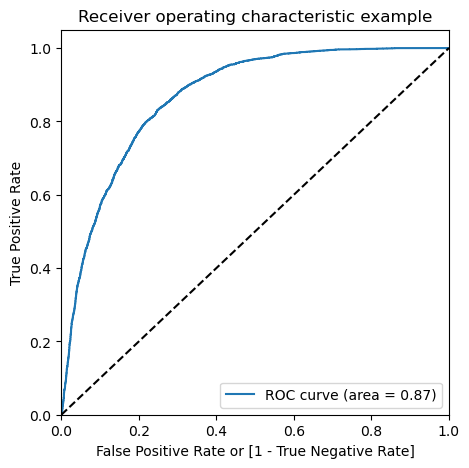




-----------------------------------------------------------------------------------------
                          Dataframe with different Cutoff Values 
-----------------------------------------------------------------------------------------

   Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.870072          1    1    1    1    1    1    1    1    1    1   
1      0    0.381089          0    1    1    1    1    0    0    0    0    0   
2      0    0.477952          0    1    1    1    1    1    0    0    0    0   
3      0    0.619930          1    1    1    1    1    1    1    1    0    0   
4      0    0.433552          0    1    1    1    1    1    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0   

-----------------------------------------------------------------------------------------
                          Confusion Matrix - For Cutoff 0.0
---------------------------------------------------------------

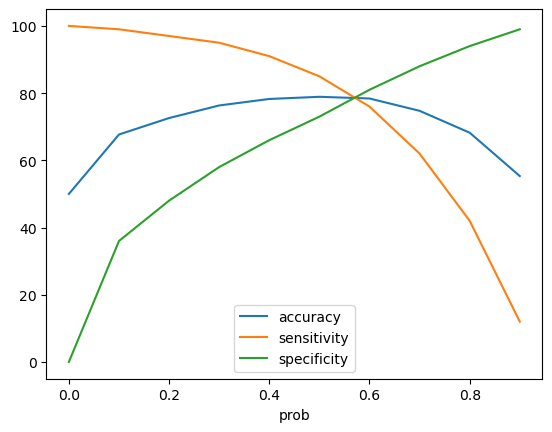



-----------------------------------------------------------------------------------------
Plot Recall/Precision
-----------------------------------------------------------------------------------------



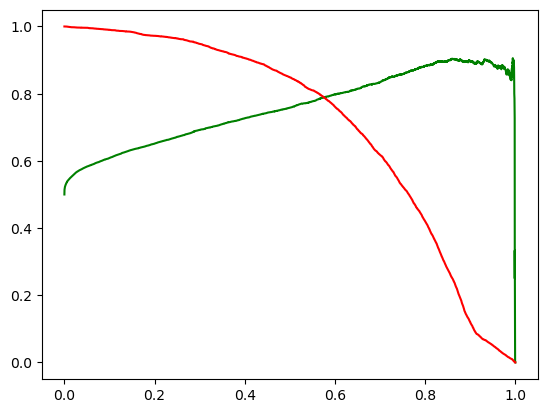

In [98]:
#y_train_pred = res.predict(X_train_sm[col])
#y_train_pred[:10]
X_train_model = X_train_model[col]
predict(res,X_train_model,y_train_sm,0.5,'N')

In [99]:
X_train_model.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12098 entries, 0 to 12097
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   offnet_mou_6         12098 non-null  float64
 1   roam_ic_mou_7        12098 non-null  float64
 2   roam_og_mou_7        12098 non-null  float64
 3   loc_og_t2t_mou_6     12098 non-null  float64
 4   loc_og_t2m_mou_7     12098 non-null  float64
 5   loc_og_t2f_mou_7     12098 non-null  float64
 6   loc_og_mou_7         12098 non-null  float64
 7   std_og_t2t_mou_6     12098 non-null  float64
 8   std_og_t2t_mou_7     12098 non-null  float64
 9   std_og_t2f_mou_6     12098 non-null  float64
 10  std_og_mou_6         12098 non-null  float64
 11  spl_og_mou_7         12098 non-null  float64
 12  total_og_mou_7       12098 non-null  float64
 13  loc_ic_t2m_mou_7     12098 non-null  float64
 14  loc_ic_t2f_mou_7     12098 non-null  float64
 15  loc_ic_mou_7         12098 non-null 

In [100]:
predict(res,X_train_model,y_train_sm,0.5,'Y')

-----------------------------------------------------------------------------------------
                          Dataframe with the predicted values
-----------------------------------------------------------------------------------------

   Churn  Churn_Prob  predicted
0      0    0.870072          1
1      0    0.381089          0
2      0    0.477952          0
3      0    0.619930          1
4      0    0.433552          0 

-----------------------------------------------------------------------------------------
                          Confusion Matrix - For Cutoff 0.5
-----------------------------------------------------------------------------------------

[[4412 1637]
 [ 915 5134]] 

* Accuracy Score - 78.90560423210448 
* Sensitivity - 85.0 
* Specificity - 73.0 
* False Positive - 27.0 
* Positive Predictive Value - 76.0 
* Negative Predictive Value - 83.0 


Top features

In [101]:
res.params.abs().sort_values(ascending=False)

loc_og_t2f_mou_7       36.406381
aug_vbc_3g             32.320405
loc_ic_t2f_mou_7       15.598326
std_og_t2t_mou_6       11.396436
loc_ic_t2m_mou_7       10.856945
std_ic_t2m_mou_6        9.223859
loc_og_t2m_mou_7        9.187180
monthly_2g_7            8.539197
offnet_mou_6            6.830073
loc_og_t2t_mou_6        6.591008
last_day_rch_amt_7      5.411348
roam_ic_mou_7           5.100036
max_rech_amt_7          4.770134
std_og_t2t_mou_7        4.661242
roam_og_mou_7           4.527296
max_rech_amt_6          3.902655
std_og_t2f_mou_6        3.808392
max_rech_data_6         3.504165
spl_og_mou_7            3.361269
av_rech_amt_data_7      3.329953
total_og_mou_7          3.275995
total_rech_amt_7        3.251933
sachet_2g_7             3.244056
total_rech_data_7       2.922002
std_og_mou_6            2.384529
ARPUGoodActionPhase     2.043190
loc_ic_mou_7            1.854499
monthly_2g_6            1.845057
loc_og_mou_7            1.227921
total_ic_mou_7          0.851707
dtype: flo

Inference - Company needs to look into the incoming and outgoing calls which user makes in action phase within the same operator both mobile and fixed line.

Company also needs to look into monthly usage of local incoming calls from other operator mobile in action phase

Company needs to revisit its charges for other operator calls

Model Evaluation

In [102]:
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_goodphase,ARPUGoodActionPhase,t2calls,tenure_in_months,tenure_in_months_bin_6-12 Months,tenure_in_months_bin_1-2 Yrs,tenure_in_months_bin_2-5 Yrs,tenure_in_months_bin_5 Yrs and above
5218,0.581825,0.163382,0.175422,0.047258,0.051081,0.056680,0.053929,0.173975,0.000000,0.128270,0.000000,0.021931,0.015514,0.009605,0.032175,0.000177,0.000736,0.000000,0.000304,0.029355,0.031249,0.020243,0.045773,0.012340,0.039370,0.000000,0.000000,0.029637,0.071697,0.0,0.0,0.000000,0.000293,0.000000,0.0,0.048580,0.099312,0.007041,0.023108,0.008754,0.035726,0.000870,0.003108,0.013076,0.050737,0.001136,0.000031,0.000000,0.002528,0.000000,0.00000,0.001136,0.001381,0.013958,0.051095,0.000000,0.009376,0.0,0.0,0.000000,0.000000,0.100000,0.175407,0.115694,0.050023,0.035484,0.050023,0.052381,0.018182,0.113636,0.014791,0.113826,0.007395,0.071448,0.001494,0.000000,0.000000,0.000000,0.00,0.0,0.025641,0.137931,0.000000,0.083333,0.000000,0.0,0.000000,0.000000,0.000000,0.027140,1.0,1.0,0.367215,False,False,True,False
2973,0.332833,0.065280,0.116740,0.000000,0.000157,0.002817,0.015705,0.000000,0.033956,0.000000,0.057508,0.000000,0.000000,0.002004,0.000399,0.003984,0.019541,0.000000,0.000000,0.002947,0.003326,0.000000,0.000000,0.000000,0.000000,0.000000,0.010154,0.000000,0.000669,0.0,0.0,0.004693,0.000000,0.018863,0.0,0.002502,0.003654,0.000186,0.000000,0.001423,0.000453,0.000316,0.000319,0.001237,0.000426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.001234,0.000417,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.072727,0.058299,0.069520,0.070032,0.038710,0.070032,0.026667,0.054545,0.045455,0.099035,0.036013,0.065595,0.027092,0.003732,0.008960,0.018786,0.032215,0.25,0.0,0.051282,0.068966,0.000000,0.000000,0.000000,0.0,0.052301,0.058109,0.060986,0.007266,1.0,1.0,0.750125,False,False,False,False
5495,0.613028,0.187159,0.326381,0.052401,0.205830,0.048809,0.017082,0.000000,0.000000,0.000000,0.000000,0.074576,0.212951,0.052637,0.037021,0.004973,0.000234,0.040435,0.000000,0.119212,0.222620,0.000000,0.000000,0.000500,0.000193,0.000000,0.000000,0.000382,0.000193,0.0,0.0,0.017397,0.000000,0.000000,0.0,0.085216,0.200229,0.043483,0.199846,0.059563,0.040953,0.009640,0.023641,0.085571,0.232766,0.000152,0.000000,0.012451,0.008840,0.002032,0.00039,0.006654,0.004782,0.090720,0.232707,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.118182,0.202648,0.302983,0.070032,0.063871,0.022738,0.061905,0.054545,0.022727,0.099035,0.127331,0.147267,0.052590,0.013473,0.020422,0.026985,0.064799,0.25,0.2,0.025641,0.000000,0.000000,0.000000,0.035714,0.0,0.143278,0.122052,0.105369,0.024793,1.0,0.0,0.562033,False,False,False,False
1475,0.170184,0.050568,0.089070,0.000606,0.000000,0.006512,0.000000,0

In [103]:
X_test = X_test[col]
predict(res,X_test[col],y_test,0.5,'Y')

-----------------------------------------------------------------------------------------
                          Dataframe with the predicted values
-----------------------------------------------------------------------------------------

      Churn  Churn_Prob  predicted
5218      0    0.336302          0
2973      0    0.277549          0
5495      0    0.000132          0
1475      0    0.001488          0
1321      0    0.467794          0 

-----------------------------------------------------------------------------------------
                          Confusion Matrix - For Cutoff 0.5
-----------------------------------------------------------------------------------------

[[1861  730]
 [  23   86]] 

* Accuracy Score - 72.11111111111111 
* Sensitivity - 79.0 
* Specificity - 72.0 
* False Positive - 28.000000000000004 
* Positive Predictive Value - 11.0 
* Negative Predictive Value - 99.0 


Logistic Regression with PCA

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

Dimension of X_train: (6297, 97)
Dimension of X_test: (2700, 97)


In [105]:
from sklearn.decomposition import PCA,IncrementalPCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [106]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (12098, 97)
Dimension of X_test_pca:  (2700, 97)


In [107]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

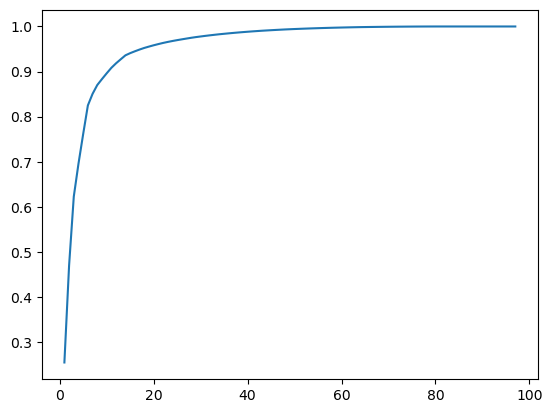

In [108]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.show()

We can see that variance becomes constant with around 16 components

In [109]:
pc2 = IncrementalPCA(n_components=16)

In [110]:
X_train_pca = pc2.fit_transform(X_train_sm)

In [111]:
X_train_pca.shape

(12098, 16)

In [112]:
logreg = LogisticRegression()
model = logreg.fit(X_train_pca, y_train_sm)

In [113]:
# making the predictions
X_test[num_col] = scaler.fit_transform(X_test[num_col])
X_test_pca = pc2.transform(X_test)
y_pred = logreg.predict(X_test_pca)


    

from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_pred,y_test),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[1878   34]
 [ 713   75]] 

Accuracy of the logistic regression model with PCA:  0.7233333333333334


In [114]:
def ModelEvaluation(y_test,y_pred):
    confusion_mx_p = metrics.confusion_matrix(y_test, y_pred )

    TP = confusion_mx_p[1,1] # true positive 
    TN = confusion_mx_p[0,0] # true negatives
    FP = confusion_mx_p[0,1] # false positives
    FN = confusion_mx_p[1,0] # false negatives
    
    accuracy_s = metrics.accuracy_score(y_test, y_pred) * 100
    print('* Accuracy Score - {0}'.format(accuracy_s),'')
    sensitivity_s = round(TP/(TP+FN),2)*100
    print('* Sensitivity - {0}'.format(sensitivity_s),'')
    specificity_s = round(TN/(TN+FP),2)*100
    print('* Specificity - {0}'.format(specificity_s),'')
    false_positive_s = round(FP/(TN+FP),2)*100
    print('* False Positive - {0}'.format(false_positive_s),'')
    positive_predictive_s = round(TP/(TP+FP),2)*100
    print('* Positive Predictive Value - {0}'.format(positive_predictive_s),'')
    negative_predictive_s = round(TN/(TN+FN),2)*100
    print('* Negative Predictive Value - {0}'.format(negative_predictive_s),'')
    print('* Recall Score - {0}'.format(recall_score(y_test,y_pred)),'')

    

In [115]:
ModelEvaluation(y_test,y_pred)

* Accuracy Score - 72.33333333333334 
* Sensitivity - 69.0 
* Specificity - 72.0 
* False Positive - 28.000000000000004 
* Positive Predictive Value - 10.0 
* Negative Predictive Value - 98.0 
* Recall Score - 0.6880733944954128 


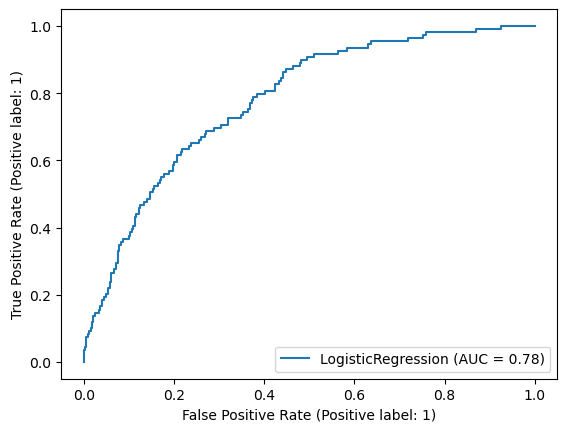

In [117]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(logreg, X_test_pca, y_test)
plt.show()


Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [119]:
X = hvc.drop(['churn'],axis=1)
y =hvc['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

#scaler = MinMaxScaler()
#X_train[num_col] = scaler.fit_transform(X_train[num_col])

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

Dimension of X_train: (6297, 97)
Dimension of X_test: (2700, 97)


In [120]:
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

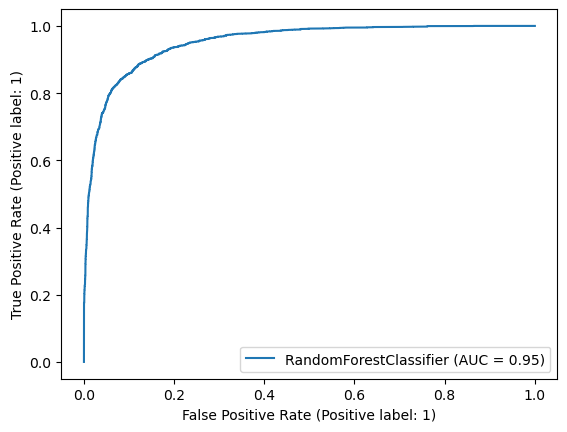

In [122]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(rf, X_train_sm, y_train_sm)
plt.show()


In [124]:
y_pred = rf.predict_proba(X_test)

predicted = (y_pred[:,1] >= 0.4).astype('int')

ModelEvaluation(y_test,predicted)

* Accuracy Score - 70.88888888888889 
* Sensitivity - 82.0 
* Specificity - 70.0 
* False Positive - 30.0 
* Positive Predictive Value - 10.0 
* Negative Predictive Value - 99.0 
* Recall Score - 0.8165137614678899 


In [125]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      2591
           1       0.10      0.82      0.18       109

    accuracy                           0.71      2700
   macro avg       0.55      0.76      0.50      2700
weighted avg       0.95      0.71      0.80      2700



Random Forest with PCA

In [126]:
rf.fit(X_train_pca, y_train_sm)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

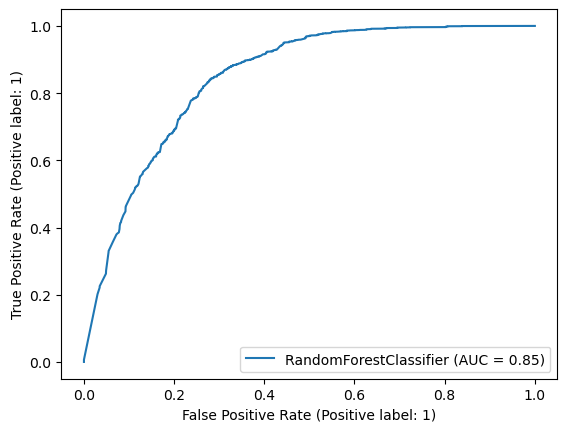

In [128]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Plot the ROC curve using the new method
RocCurveDisplay.from_estimator(rf, X_train_pca, y_train_sm)
plt.show()


In [129]:
y_pred = rf.predict_proba(X_test_pca)

predicted = (y_pred[:,1] >= 0.4).astype('int')

ModelEvaluation(y_test,predicted)

* Accuracy Score - 54.333333333333336 
* Sensitivity - 77.0 
* Specificity - 53.0 
* False Positive - 47.0 
* Positive Predictive Value - 7.000000000000001 
* Negative Predictive Value - 98.0 
* Recall Score - 0.7706422018348624 


In [130]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      0.53      0.69      2591
           1       0.07      0.77      0.12       109

    accuracy                           0.54      2700
   macro avg       0.52      0.65      0.41      2700
weighted avg       0.95      0.54      0.67      2700



Hyperparameter Tuning in Random Forest and using PCA

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,4,5,6,7,8,10],
    'min_samples_leaf': [5,10,20,50,60],
    'n_estimators': [10, 25, 50, 100]
}

In [133]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1,scoring='recall')

In [134]:
grid_search.fit(X_train_pca, y_train_sm)

Fitting 4 folds for each of 160 candidates, totalling 640 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 60],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [135]:
GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 60],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 60],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [136]:
rf = grid_search.best_estimator_
rf

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [139]:
from sklearn.ensemble import RandomForestClassifier  # or your relevant model
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


In [140]:
y_pred = rf.predict_proba(X_train_pca)

predicted = (y_pred[:,1] >= 0.35).astype('int')

In [141]:
ModelEvaluation(y_train_sm,predicted)

* Accuracy Score - 86.9069267647545 
* Sensitivity - 100.0 
* Specificity - 74.0 
* False Positive - 26.0 
* Positive Predictive Value - 79.0 
* Negative Predictive Value - 100.0 
* Recall Score - 0.9988427839312283 


In [142]:
y_pred = rf.predict_proba(X_test_pca)

predicted = (y_pred[:,1] >= 0.35).astype('int')

ModelEvaluation(y_test,predicted)

* Accuracy Score - 72.14814814814815 
* Sensitivity - 65.0 
* Specificity - 72.0 
* False Positive - 28.000000000000004 
* Positive Predictive Value - 9.0 
* Negative Predictive Value - 98.0 
* Recall Score - 0.6513761467889908 


In [143]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      2591
           1       0.09      0.65      0.16       109

    accuracy                           0.72      2700
   macro avg       0.54      0.69      0.50      2700
weighted avg       0.94      0.72      0.81      2700



Hyperparameter Tuning in Random Forest and without using PCA

In [144]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1,scoring='recall')
params = {
    'max_depth': [2,3,4,5,6,7,8,10],
    'min_samples_leaf': [5,10,20,50,60],
    'n_estimators': [10, 25, 50, 100]
}
grid_search.fit(X_train_sm, y_train_sm)

Fitting 4 folds for each of 160 candidates, totalling 640 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 60],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [145]:
rf = grid_search.best_estimator_
rf

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

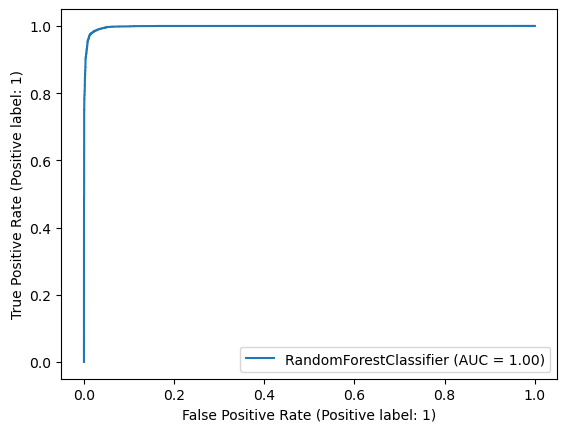

In [147]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Use the new method to plot the ROC curve
RocCurveDisplay.from_estimator(rf, X_train_sm, y_train_sm)
plt.show()


In [148]:
y_pred = rf.predict_proba(X_train_sm)

predicted = (y_pred[:,1] >= 0.28).astype('int')

ModelEvaluation(y_train_sm,predicted)

* Accuracy Score - 94.7842618614647 
* Sensitivity - 100.0 
* Specificity - 90.0 
* False Positive - 10.0 
* Positive Predictive Value - 91.0 
* Negative Predictive Value - 100.0 
* Recall Score - 0.9986774673499752 


In [149]:
#y_pred = rf.predict(X_test)
y_pred = rf.predict_proba(X_test)

predicted = (y_pred[:,1] >= 0.28).astype('int')

ModelEvaluation(y_test,predicted)

* Accuracy Score - 84.4074074074074 
* Sensitivity - 72.0 
* Specificity - 85.0 
* False Positive - 15.0 
* Positive Predictive Value - 17.0 
* Negative Predictive Value - 99.0 
* Recall Score - 0.7247706422018348 


In [150]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      2591
           1       0.17      0.72      0.27       109

    accuracy                           0.84      2700
   macro avg       0.58      0.79      0.59      2700
weighted avg       0.95      0.84      0.89      2700



XGBoost

In [151]:
col = X_train_sm.columns[rfe.support_]
X_train_rfe = X_train[col]


In [158]:
import xgboost as xgb
from sklearn import model_selection, metrics

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define hyperparameter grid
parameters = {
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
}

# Define the scorer
scorer = metrics.make_scorer(metrics.roc_auc_score,
                              greater_is_better=True,
                              needs_proba=True,
                              needs_threshold=False)

# Initialize GridSearchCV
clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                        param_grid=parameters,
                                        n_jobs=-1,
                                        cv=3,
                                        scoring=scorer,
                                        refit=True,
                                        verbose=1)

# Fit the model
clf_xgb.fit(X_train_rfe, y_train)

# Output the best parameters and score
print("Best parameters:", clf_xgb.best_params_)
print("Best ROC AUC score:", clf_xgb.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3}
Best ROC AUC score: 0.8980766984537686


In [157]:
import xgboost as xgb
print(xgb.__version__)

2.1.1


In [156]:
pip install xgboost


  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [159]:
rf = clf_xgb.best_estimator_
rf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

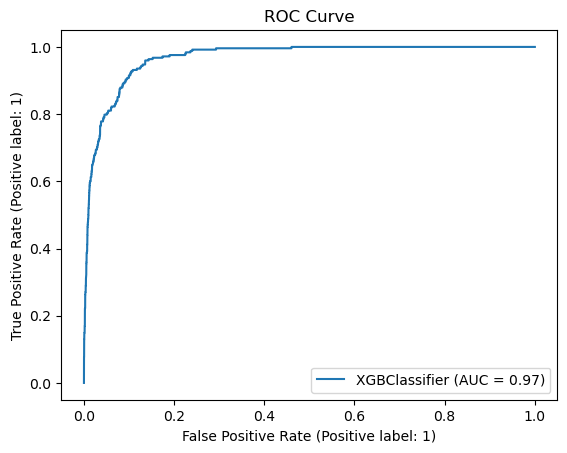

In [161]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Assuming rf, X_train_rfe, and y_train are already defined
RocCurveDisplay.from_estimator(rf, X_train_rfe, y_train)
plt.title('ROC Curve')
plt.show()


In [162]:
#y_pred = rf.predict(X_test)
y_pred = rf.predict_proba(X_test[col])

predicted = (y_pred[:,1] > 0.1).astype('int')

ModelEvaluation(y_test,predicted)

* Accuracy Score - 91.51851851851852 
* Sensitivity - 54.0 
* Specificity - 93.0 
* False Positive - 7.000000000000001 
* Positive Predictive Value - 25.0 
* Negative Predictive Value - 98.0 
* Recall Score - 0.5412844036697247 


In [163]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2591
           1       0.25      0.54      0.34       109

    accuracy                           0.92      2700
   macro avg       0.61      0.74      0.65      2700
weighted avg       0.95      0.92      0.93      2700



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = 'test.csv'  # Change this to the correct path if necessary
data = pd.read_csv(file_path)

# Handle missing values
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# Encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Keep 'id' for final output and assume 'arpu_6' is the target column
ids = data['id']
X = data.drop(['id', 'arpu_6'], axis=1)
y = data['arpu_6']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, ids, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Create a DataFrame for output, including 'id', 'Actual', and 'Predicted'
predictions = pd.DataFrame({
    'id': ids_test,
    'Actual': y_test,
    'Predicted': y_pred
})

# Reindex the predictions to cover the entire row count (0 to 29999)
predictions = predictions.reindex(range(30000), fill_value=None)

# Save predictions to a CSV file
predictions.to_csv('Telecom_Churn_predictions.csv', index=False)

print("Predictions saved to predictions_with_id.csv")
